In [ ]:
import  torch
from torch import nn
torch.__version__

'1.13.1+cu116'

In [ ]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#download formatted data from github
import requests
import zipfile
from pathlib import Path
data_path= Path("data/")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one..")
  image_path.mkdir(parents = True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downloading pizza, steak, sushi data...")
    f.write(request.content)
  
  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("unzipping pizza, steak, sushi data...")
    zip_ref.extractall(data_path/"pizza_steak_sushi")

Did not find data/pizza_steak_sushi directory, creating one..
downloading pizza, steak, sushi data...
unzipping pizza, steak, sushi data...


In [ ]:
#!apt install unzip

In [ ]:
#!unzip "/content/data/pizza_steak_sushi.zip" -d "/content/data/pizza_steak_sushi"

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image path: data/pizza_steak_sushi/test/steak/100274.jpg
image class: steak
image height: 384
image width: 512


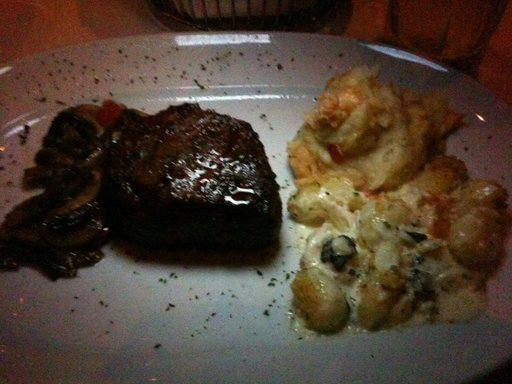

In [ ]:
import random
from PIL import Image
random.seed(56)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f"random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

In [ ]:
type(img) #img is PIL format, not numpy array or tensor

PIL.JpegImagePlugin.JpegImageFile

(-0.5, 511.5, 383.5, -0.5)

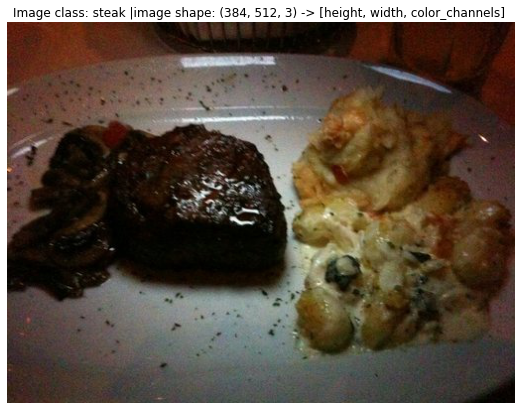

In [ ]:
#plot using matplotllib, need to convert into numpy array
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.asarray(img)
#type(img_as_array)
plt.figure(figsize =(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} |image shape: {img_as_array.shape} -> [height, width, color_channels] ")
plt.axis(False)

In [ ]:
#now use pytorch
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
#let's check above data_transform is correct. try in a random img
#function for data transformation
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")
      fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)

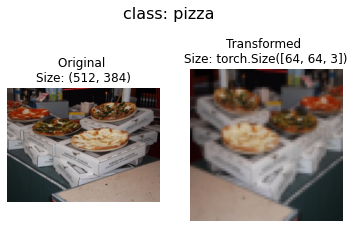

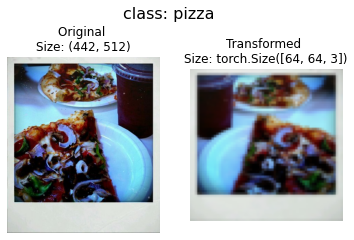

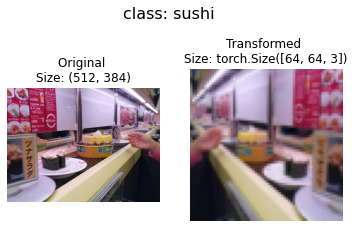

In [ ]:
plot_transformed_images(image_paths=image_path_list, transform = data_transform, n=3)

In [ ]:
# now creat dataset using image folder
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)
print(f"train_data: \n{train_data}\ntest data: \n{test_data}")

train_data: 
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
test data: 
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
type(train_data), type(test_data), len(train_data), len(test_data)

(torchvision.datasets.folder.ImageFolder,
 torchvision.datasets.folder.ImageFolder,
 225,
 75)

In [ ]:
#class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
img, label = train_data[0][0], train_data[0][1]
img.shape


torch.Size([3, 64, 64])

In [ ]:
#change the order of dimesnions
img_permute = img.permute(1,2,0)
img_permute.shape

torch.Size([64, 64, 3])

In [ ]:
# make datasets into dataloader for making them iterable 
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size =2,
                              num_workers=1,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size =2,
                             num_workers=1,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb62b38c7f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb62b38c910>)

In [ ]:
#how many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

In [ ]:
len(train_dataloader),type(train_dataloader)

(113, torch.utils.data.dataloader.DataLoader)

In [ ]:
img, label = next(iter(train_dataloader))

In [ ]:
img.shape

torch.Size([2, 3, 64, 64])

In [ ]:
label

tensor([2, 2])

In [ ]:
#next is to make model and train, but before try another method to create custom dataset
#it will be done by replicating torchvision.datasets.ImageFolder() by subclassing torch.utils.data.Dataset
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
target_directory = train_dir
print(f"Target directory: {target_directory}")
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"class names found :{class_names_found}")

Target directory: data/pizza_steak_sushi/train
class names found :['pizza', 'steak', 'sushi']


In [ ]:
 #make a funciton 
 def find_classes(directory:str) -> Tuple[List[str], Dict[str, int]]:
   classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
   if not classes:
     raise FileNotFoundError(f"couldn't find any classes in {directory}.")
   class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
   return classes, class_to_idx

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str, transform=None) -> None:
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)
  
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)
  def __len__(self) ->int:
    return len(self.paths)
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
# create some transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                     transform = test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fb62b348280>,
 <__main__.ImageFolderCustom at 0x7fb62b348a00>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
def display_random_images (dataset:torch.utils.data.dataset.Dataset,
                           classes: List[str] = None,
                           n:int = 10,
                           display_shape: bool = True,
                           seed: int = None):
  if n>10:
    n = 10
    display_shape = False
    print(f"For display purpose,n shouldn't be larger than 10, setting to 10 and removing shape display")
  if seed:
    random.seed(seed)
  random_samples_idx = random.sample(range(len(dataset)), k =n)
  plt.figure(figsize=(16,8))
  for i , targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_adjust = targ_image.permute(1,2,0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)








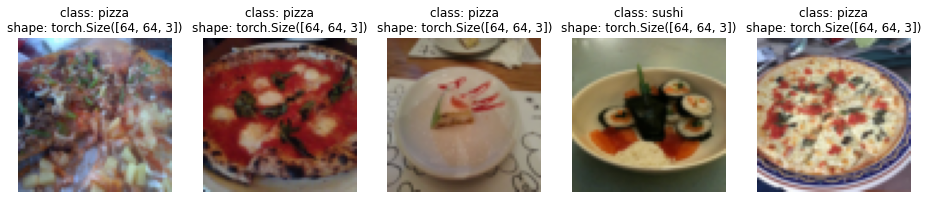

In [ ]:
import matplotlib.pyplot as plt
display_random_images(train_data,
                      n=5,
                      classes = class_names,
                      seed = None)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = 4,
                                     num_workers = 0,
                                     shuffle = True)
test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                    batch_size = 4,
                                    num_workers=0,
                                    shuffle = False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fb62a9a9820>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb62a9a9670>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))


In [ ]:
#create model
from torchvision import transforms
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:
from torchvision import datasets
train_data_sample = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)
test_data_sample = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)
#turn dataset into dataloader
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"creating Dataloader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")
train_dataloader_simple = DataLoader(dataset = train_data_sample,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset =test_data_sample,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKERS)

creating Dataloader's with batch size 32 and 2 workers.


In [ ]:
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7fb62a99e280>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb62a9a9160>)

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size =3,
                  stride = 1,
                  padding =1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size =3,
                  stride =1,
                  padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units *16*16,
                  out_features = output_shape)
    )
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    #print(x.shape)
    x  = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [ ]:
torch.manual_seed(2)
model_0 = TinyVGG(input_shape =3,
                  hidden_units =10,
                  output_shape = len(train_data.classes)).to(device)

In [ ]:
#model_0.state_dict() # to see model input how dimension [[[[ -means 4 dimension

In [ ]:
#see whether model is working or not by passing one image
img_batch, label_batch = next(iter(train_dataloader_simple))
img_single= img_batch[0]
print(img_single.shape) # [3, 64, 64] is 3 dimenstion, but model requires 4dimension, so unsquizze apply
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(img_single.shape)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])


In [ ]:
#now test model with single image
model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single.to(device))
print(pred)
prob = torch.argmax(pred, dim=1)
print(prob)
print(f"actual lable: {label_single}")

tensor([[-0.0494, -0.0137, -0.0028]], device='cuda:0')
tensor([2], device='cuda:0')
actual lable: 1


In [ ]:
# use torchinfo to get an idea of the shape
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0, input_size = [1,3,64,64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:
#training loop in function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0,0
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1),dim=1)
    train_acc += (y_pred_class ==y).sum().item()/len(y_pred)
  train_loss = train_loss /len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
#testing loop functin
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for batch, (Xtest, ytest) in enumerate(dataloader):
      Xtest, ytest = Xtest.to(device), ytest.to(device)
      test_pred_logits = model(Xtest)
      loss = loss_fn(test_pred_logits, ytest)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels ==ytest).sum().item()/len(test_pred_labels))
  test_loss = test_loss /len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5):
  results = {"train_loss":[],
             "train_acc": [],
             "test_loss": [],
             "test_acc":  []
             }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer)
    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)
    print(f"Epoch: {epoch+1} | train_loss: {train_loss:.4f} |train_acc: {train_acc:.4f} |test_loss: {test_loss:.4f}| test_acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results



In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS=50
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time: .3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1009 |train_acc: 0.4258 |test_loss: 1.1077| test_acc: 0.2604
Epoch: 2 | train_loss: 1.0840 |train_acc: 0.4258 |test_loss: 1.1237| test_acc: 0.2604
Epoch: 3 | train_loss: 1.0754 |train_acc: 0.4258 |test_loss: 1.1498| test_acc: 0.2604
Epoch: 4 | train_loss: 1.1232 |train_acc: 0.3047 |test_loss: 1.1580| test_acc: 0.2604
Epoch: 5 | train_loss: 1.0803 |train_acc: 0.4258 |test_loss: 1.1465| test_acc: 0.2604
Epoch: 6 | train_loss: 1.1010 |train_acc: 0.3047 |test_loss: 1.1467| test_acc: 0.2604
Epoch: 7 | train_loss: 1.0956 |train_acc: 0.3047 |test_loss: 1.1384| test_acc: 0.2604
Epoch: 8 | train_loss: 1.0926 |train_acc: 0.4375 |test_loss: 1.1321| test_acc: 0.2604
Epoch: 9 | train_loss: 1.1266 |train_acc: 0.3359 |test_loss: 1.1331| test_acc: 0.2604
Epoch: 10 | train_loss: 1.0740 |train_acc: 0.4453 |test_loss: 1.0845| test_acc: 0.3826
Epoch: 11 | train_loss: 1.0631 |train_acc: 0.4727 |test_loss: 1.0685| test_acc: 0.2907
Epoch: 12 | train_loss: 1.0765 |train_acc: 0.3164 |t

In [ ]:
#plot loss and accuracy
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results['train_loss']
  test_loss = results['test_loss']
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']
  epochs = range(len(results['train_loss']))
  plt.figure(figsize=(15, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label = 'test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label = 'test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();



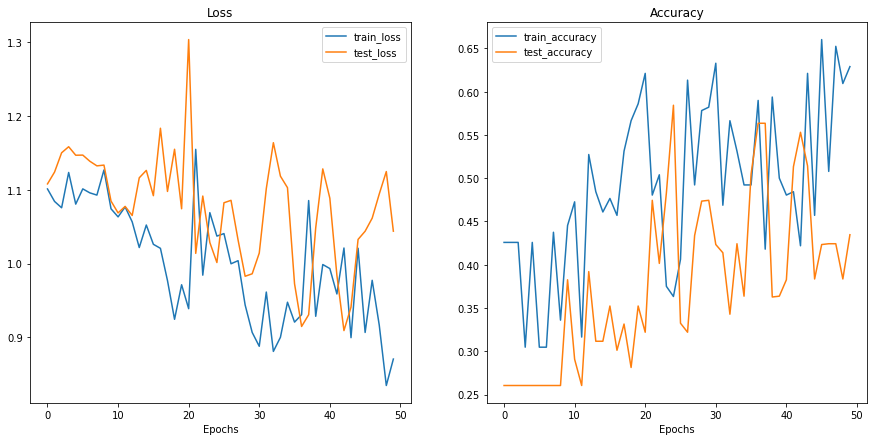

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
#create another model and compare it with model0
#create model
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins =31),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_sample = datasets.ImageFolder(root = train_dir,
                                         transform = train_transform_trivial)
test_data_sample = datasets.ImageFolder(root = test_dir,
                                        transform = test_transform)
#turn dataset into dataloader
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"creating Dataloader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")
train_dataloader_simple = DataLoader(dataset = train_data_sample,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset =test_data_sample,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKERS)

creating Dataloader's with batch size 32 and 2 workers.


In [ ]:
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7fb6284b1fa0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb6284dfc10>)

In [ ]:
torch.manual_seed(2)
model_1 = TinyVGG(input_shape =3,
                  hidden_units =10,
                  output_shape = len(train_data.classes)).to(device)

In [ ]:
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS=50
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer
start_time = timer()
model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time: .3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1027 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 2 | train_loss: 1.1027 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 3 | train_loss: 1.1026 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 4 | train_loss: 1.0984 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 5 | train_loss: 1.1029 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 6 | train_loss: 1.0985 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 7 | train_loss: 1.0985 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 8 | train_loss: 1.1028 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 9 | train_loss: 1.0972 |train_acc: 0.4023 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 10 | train_loss: 1.1027 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 11 | train_loss: 1.1028 |train_acc: 0.2812 |test_loss: 1.0939| test_acc: 0.5417
Epoch: 12 | train_loss: 1.0972 |train_acc: 0.4023 |t

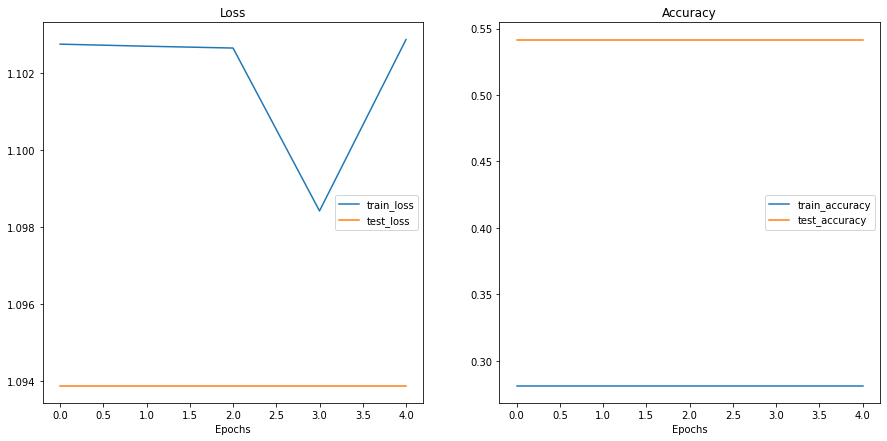

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
#model_0_df
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.102747,0.28125,1.093884,0.541667
1,1.102694,0.28125,1.093884,0.541667
2,1.102646,0.28125,1.093884,0.541667
3,1.098417,0.28125,1.093884,0.541667
4,1.102866,0.28125,1.093884,0.541667


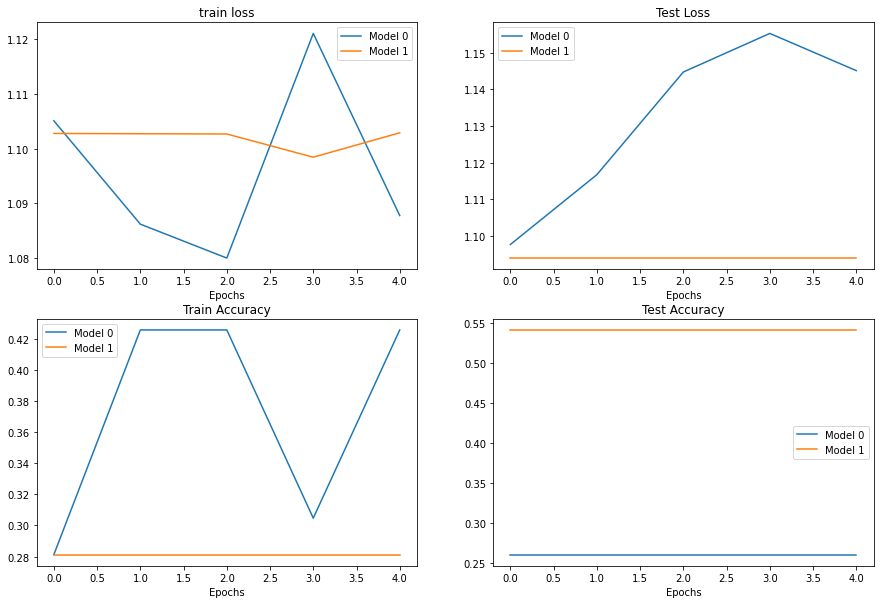

In [ ]:
#compare both model
plt.figure(figsize=(15,10))
epochs = range(len(model_0_df))
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label="Model 0")
plt.plot(epochs, model_1_df['train_loss'], label="Model 1")
plt.title("train loss")
plt.xlabel("Epochs")
plt.legend()
#test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()
# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();


In [ ]:
#prediction on custom image
import requests
custom_image_path = data_path / "04-pizza-dad.jpeg"
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists,skipping download.")

In [ ]:
import torchvision
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
print(f"custom image tensor:\n{custom_image_unit8}\n")
print(f"custom image shape: {custom_image_unit8.shape}")
print(f"custom image dtype: {custom_image_unit8.dtype}")

In [ ]:
# model_1.eval()
# with torch.inference_mode():
#   model_1(custom_image_unit8.to(device))
#show the runtimeError

In [ ]:
#load custom image and convert into tensor to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image = custom_image /255
print(custom_image)
print(custom_image.shape)
print(custom_image.dtype)

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

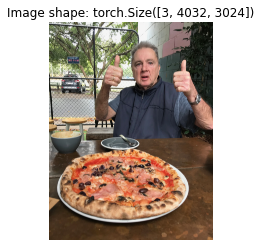

In [ ]:
#plot
plt.imshow(custom_image.permute(1,2,0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize((64,64))
])
custom_image_transformed = custom_image_transform(custom_image)
print(f"original shape:{custom_image.shape}")
print(f"transformed shape: {custom_image_transformed.shape}")

original shape:torch.Size([3, 4032, 3024])
transformed shape: torch.Size([3, 64, 64])


In [ ]:
# model_1.eval()
# with torch.inference_mode():
#   custom_image_pred = model_1(custom_image_transformed.to(device))
#show error becuase of shape mismatch

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_with_batch = custom_image_transformed.unsqueeze(dim=0)
  custom_image_pred = model_1(custom_image_with_batch.to(device))
  print(custom_image_with_batch.shape)

torch.Size([1, 3, 64, 64])


In [ ]:
custom_image_pred # this are the logit form output

tensor([[-0.0526, -0.0126, -0.0039]], device='cuda:0')

In [ ]:
#convert it into prediction probabillites using softmax
custom_img_pred_prob = torch.softmax(custom_image_pred, dim=1)
print(f"prediciton probabilites: {custom_img_pred_prob}")
#convert probabilites into labels
custom_label = torch.argmax(custom_img_pred_prob, dim=1)
print(f" prediciton label: {custom_label}")

prediciton probabilites: tensor([[0.3236, 0.3368, 0.3397]], device='cuda:0')
 prediciton label: tensor([2], device='cuda:0')


In [ ]:
custom_image_pred_class = class_names[custom_label.cpu()]
custom_image_pred_class

'sushi'

In [ ]:
#custom image into a function
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str]=None,
                        transform = None,
                        device: torch.device = device):
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image/255
  if transform:
    target_image = transform(target_image)
  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(dim=0)
    target_image_pred = model(target_image.to(device))
  target_image_prob = torch.softmax(target_image_pred, dim=1)
  target_image_label = torch.argmax(target_image_prob, dim=1)
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"Pred: {class_names[target_image_label.cpu()]} | Prob: {target_image_prob.max().cpu():.3f}"
  else: 
    title = f"Pred: {target_image_label} | Prob: {target_image_prob.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False);


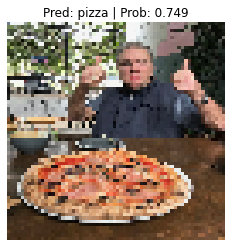

In [ ]:
pred_and_plot_image(model=model_0,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device= device)

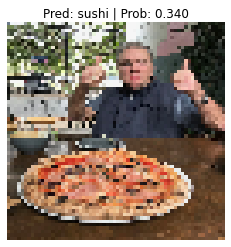

In [ ]:
pred_and_plot_image(model=model_1,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device= device)